<a href="https://colab.research.google.com/github/gilarndw/ds_customer_classification/blob/main/Customer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Importing drive to mount Gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#@title Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

customer_data = pd.read_csv('/content/drive/My Drive/datasets/marketing_campaign.csv', sep='\t')

In [3]:
customer_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


After we import and get the data, we're going to analyze and clean the data

#Data Cleaning

In [4]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

We noticed there are some missing values in Income column

In [5]:
#Clear the Null values from our datasets
customer_data = customer_data.dropna()

Now, we're going to create or determined some features

In [6]:
customer_data['Dt_Customer'] = customer_data['Dt_Customer'].apply(pd.to_datetime)
#transform Dt_customer Dtypes to datetime

In [7]:
customer_data['Dt_Customer'].max()
#determine the maximum date to
#measure customer's age based on year birth

Timestamp('2014-12-06 00:00:00')

In [8]:
customer_data['Age'] = 2014 - customer_data['Year_Birth'] 
#create Age column and calculate the customer's age

In [9]:
#calculate total amount of childern
customer_data['Children'] = customer_data['Kidhome'] + customer_data['Teenhome']

#divide Marital_Status into 2 categories
status = {
    'Single': 'Single',
    'Together': 'In relationship',
    'Married': 'In relationship',
    'Divorced': 'Single',
    'Widow': 'Single',
    'Alone': 'Single',
    'Absurd': 'Single',
    'YOLO': 'Single'
}
customer_data['Marital_Status'] = customer_data['Marital_Status'].map(status)

#calculate total family size
customer_data['Family_Size'] = customer_data['Marital_Status'].replace({"Single": 1, "In relationship": 2}) + customer_data['Children']

In [10]:
#sum the total money spent
customer_data['Total_Spent'] = customer_data['MntFishProducts']+customer_data['MntFruits']+customer_data['MntGoldProds']+customer_data['MntMeatProducts']+customer_data['MntSweetProducts']+customer_data['MntWines']

#divide education level into 3 categories
customer_data['Education'] = customer_data['Education'].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#add parenthood feature
customer_data['Is_Parent'] = np.where(customer_data.Children > 0, 1, 0)

#renaming some columns, so it's easier to read
customer_data = customer_data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#deleting some columns that we don't need
customer_data = customer_data.drop(["Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"], axis=1)

In [11]:
customer_data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children,Family_Size,Total_Spent,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,45.179603,0.947202,2.592509,607.075361,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417,11.985554,0.749062,0.905722,602.900476,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,1.000000,5.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,0.000000,2.000000,69.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,1.000000,3.000000,396.500000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,1.000000,3.000000,1048.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,121.000000,3.000000,5.000000,2525.000000,1.000000


We're going to plot and see some visualization

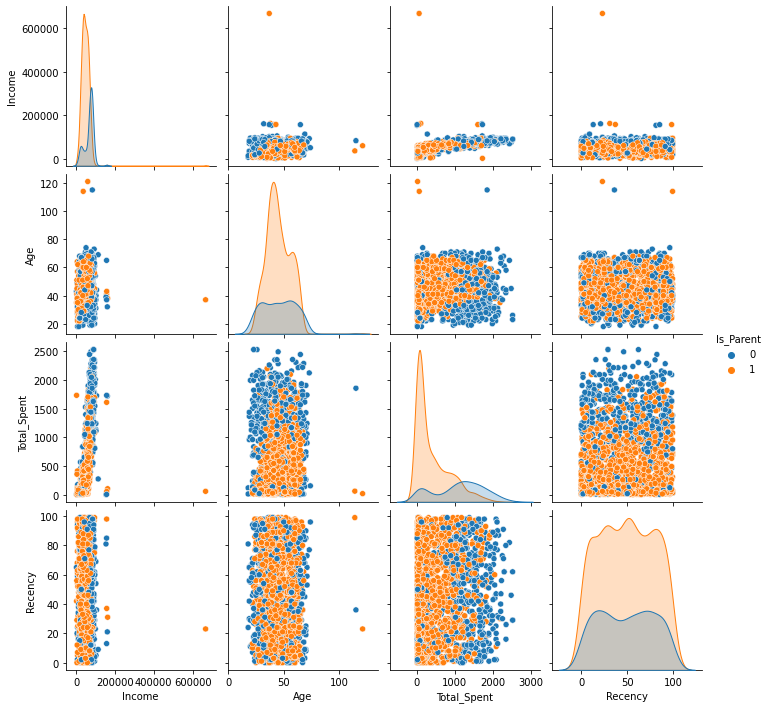

In [12]:
to_plot = ['Income', 'Age', 'Total_Spent', 'Recency', 'Is_Parent']
sns.pairplot(customer_data[to_plot], hue='Is_Parent')

From the plot above, we can see there are some outliers.

We're going to remove that, so in the end our datasets will clean enough to process

In [13]:
#Cleaning outliers
customer_data = customer_data[(customer_data['Age']<100)]
customer_data = customer_data[(customer_data['Income'])<600000]

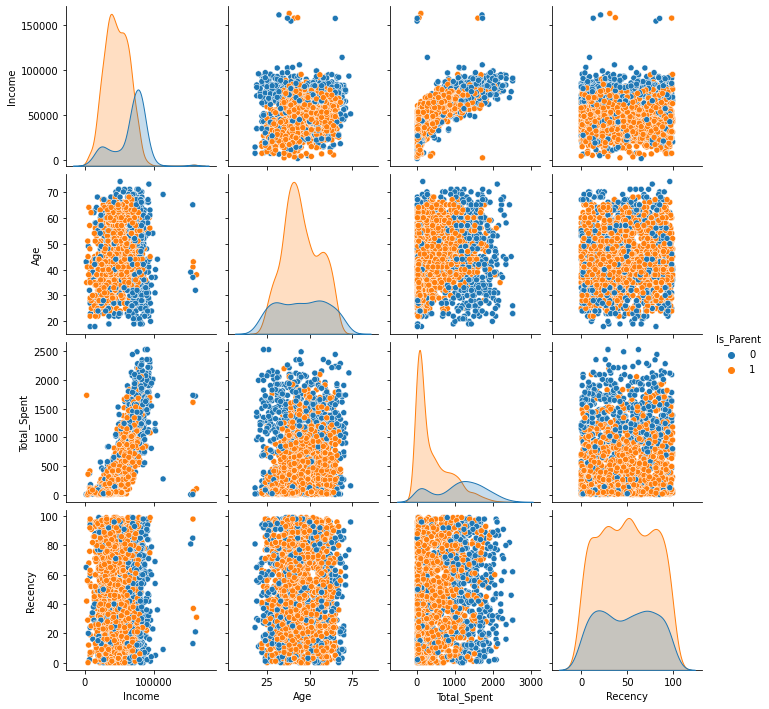

In [14]:
#Check the plot of the data after we clear some outliers
sns.pairplot(customer_data[to_plot], hue='Is_Parent')

We still have a little bit of outliers in Income, but it's still a fair amount of value

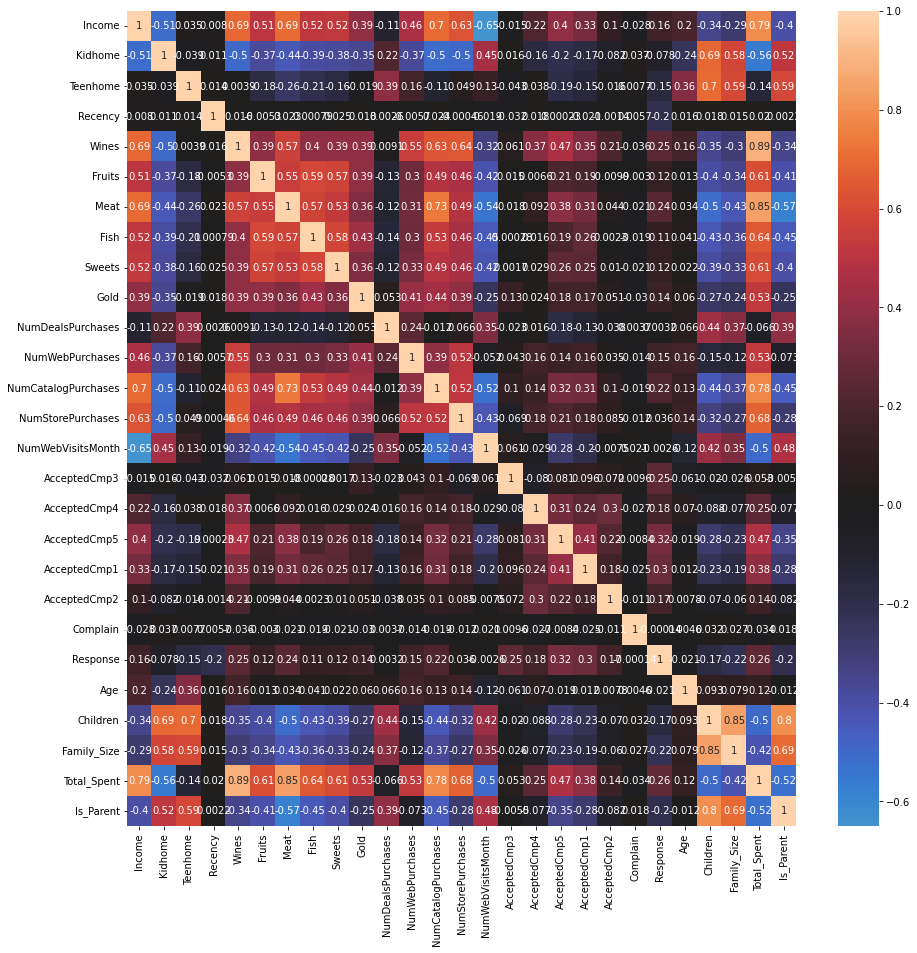

In [15]:
#See the correlation between each features
plt.figure(figsize=(15,15))
sns.heatmap(customer_data.corr(),annot=True, center=0)

We've done cleaning the data, and now we're going to proceed to the next step.

#Data Preprocessing.

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#Converting text data into numeric data
customer_data['Marital_Status'] = customer_data[['Marital_Status']].apply(le.fit_transform)
customer_data['Education'] = customer_data[['Education']].apply(le.fit_transform)

customer_data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children,Family_Size,Total_Spent,Is_Parent
0,0,1,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57,0,1,1617,0
1,0,1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60,2,3,27,1
2,0,0,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,49,0,2,776,0
3,0,0,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30,1,3,53,1
4,1,0,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33,1,3,422,1


In [17]:
#Scaling the data with StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data)
scaled_data

array([[-0.8935862 ,  1.34960312,  0.28710487, ..., -1.75835869,
         1.67624537, -1.58113883],
       [-0.8935862 ,  1.34960312, -0.26088203, ...,  0.44907004,
        -0.96329696,  0.63245553],
       [-0.8935862 , -0.74095857,  0.9131964 , ..., -0.65464433,
         0.28011009, -1.58113883],
       ...,
       [-0.8935862 ,  1.34960312,  0.23334696, ..., -1.75835869,
         1.05205171, -1.58113883],
       [ 0.5716567 , -0.74095857,  0.80317156, ...,  0.44907004,
         0.39133608,  0.63245553],
       [ 0.5716567 , -0.74095857,  0.04229031, ...,  1.55278441,
        -0.72258398,  0.63245553]])

We've done preprocessing our customer data by converting into numeric data and scale the data.

#Clustering

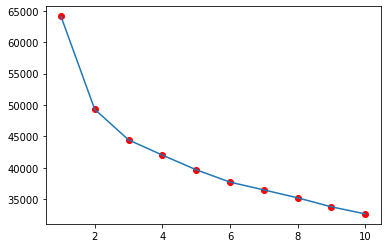

In [18]:
#We're going to use K-Means for clustering
from sklearn.cluster import KMeans

#Determined how many centroids we're going to use
#using elbow method
k = []
for i in range(1,11):
  mean = KMeans(n_clusters=i, random_state=0, init="k-means++")
  mean.fit(scaled_data)
  k.append(mean.inertia_)

plt.plot(range(1,11),k)
plt.scatter(range(1,11), k, color='red')

From the plot above, it seems like the elbow is at k=3.

We're going to use k=3

In [19]:
kms = KMeans(n_clusters=3)

#now we're going to add clusters feature to our datasets
kms.fit(scaled_data)
clusters = kms.predict(scaled_data)
customer_data['Clusters'] = clusters
customer_data['Clusters'].head()

0    0
1    2
2    0
3    2
4    2
Name: Clusters, dtype: int32

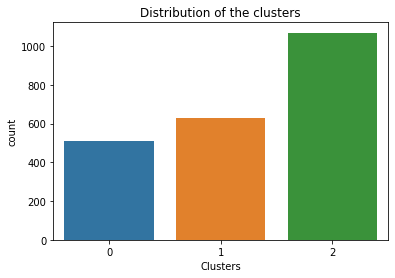

In [20]:
#Plotting the distribution of clusters

clus_plot = sns.countplot(x=customer_data['Clusters'])
clus_plot.set_title("Distribution of the clusters")
plt.show()

It seems our cluster fairly distributed between cluster 0 and cluster 1.

However, cluster 2 significantly different from others. but we're going to continue evaluating this model.

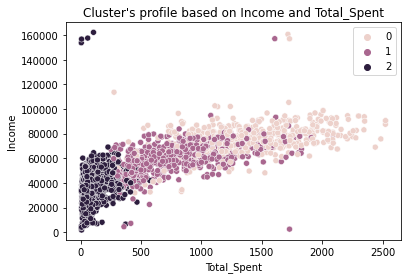

In [23]:
clus_plot = sns.scatterplot(data=customer_data, x=customer_data['Total_Spent'], 
                         y=customer_data['Income'], hue=customer_data['Clusters'])
clus_plot.set_title("Cluster's profile based on Income and Total_Spent")
plt.legend()
plt.show()


From the plot above, we can see the clusters pattern:

1. cluster 0 = high spending with high income
2. cluster 1 = high spending with average income
3. cluster 2 = low spending with low income

from this classification we can focus on clusters with high income to explore what kind of marketing campaign strategies we're going to apply.

#Profiling

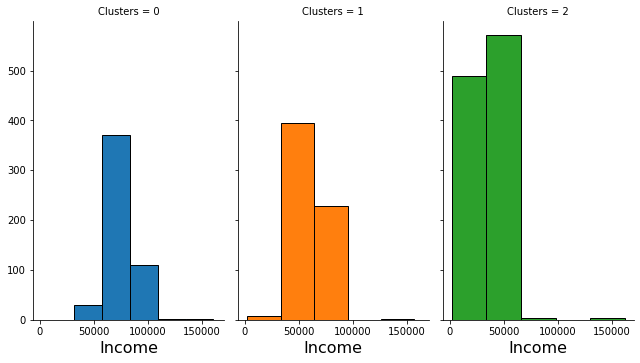

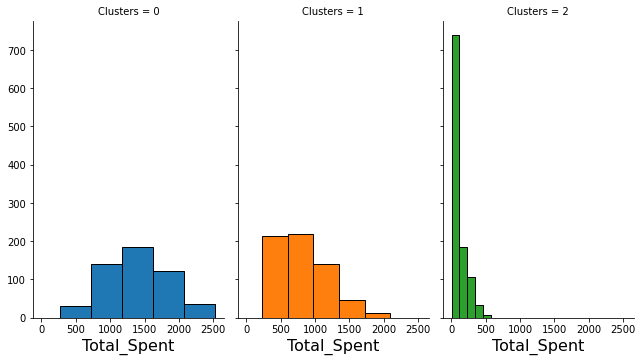

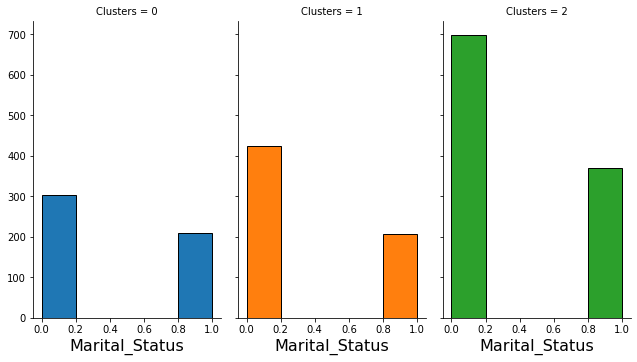

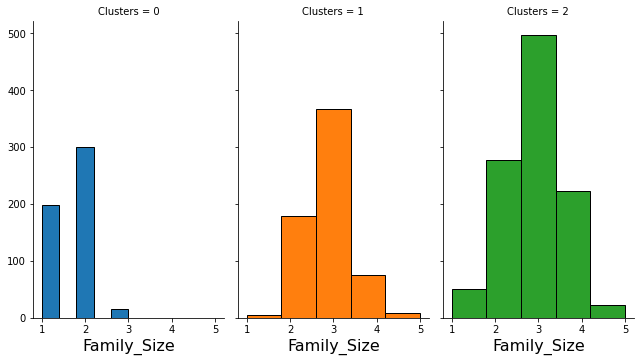

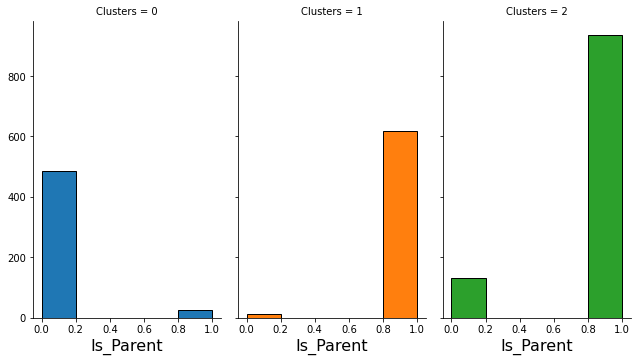

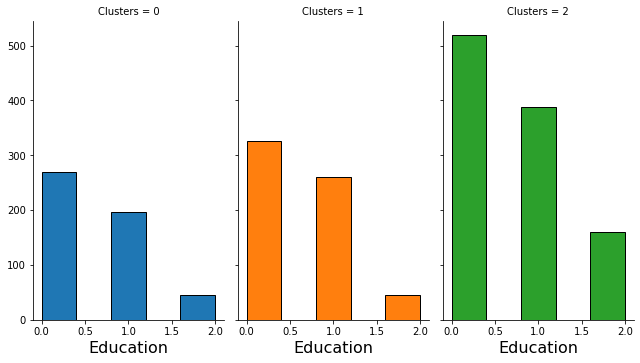

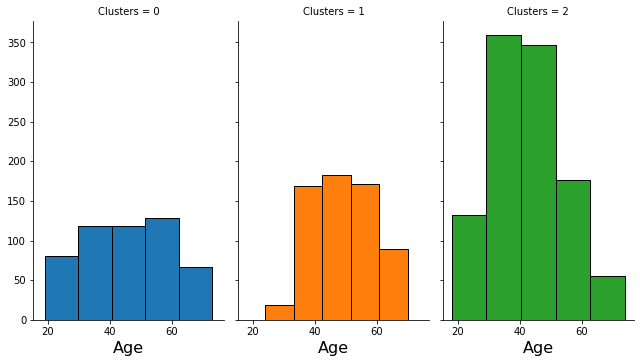

In [25]:
#Set columns that going to be used to profiling
cols = ['Income', 'Total_Spent', 'Marital_Status', 'Family_Size', 'Is_Parent',
        'Education', 'Age']

for col in cols:
  diag = sns.FacetGrid(customer_data, col='Clusters', hue='Clusters')
  diag.map(plt.hist, col, bins=5, ec='k')
  diag.set_xlabels(size=16)
  diag.fig.set_figheight(6)

**From profiling above, We come to conclusion**

1. Cluster 0:
* majority between age 40 - 55 relatively younger
-most of them graduated
-majority not a parent and don't have kids
-majority spend over 1500 USD with income between 60k - 100k

2. Cluster 1:
* majority on their 50's relatively older
-most of them graduated
-majority a parent with family size of 3
-majority spend over 500 to 1000 with income between 45k - 55k

3. Cluster 2:
* they are the youngest, with average age between early 30's - late 40's
-most of them graduated
-majority a parent with maximum family size of 4
-have the lowest spending, in just below 500 with income below 50k